Mount The Drive For Importing The Images

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [2]:
# CHANGING THE VERSION OF THE TENSORFLOW.
%tensorflow_version 1.x
import tensorflow as tf
print(tf.__version__)

TensorFlow 1.x selected.
1.15.2


In [3]:
# Importing the Libraries
from keras.preprocessing.image import ImageDataGenerator, load_img
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
from keras import backend as K
from keras import optimizers
import scipy


from keras.models import load_model
from keras.preprocessing import image
import numpy as np
from os import listdir
from os.path import isfile, join

Using TensorFlow backend.


In [4]:
# Size of the Input Images
input_shape=(150,150,3)
img_width=150
img_height=150


nb_train_samples=240
nb_validation_samples=60
batch_size=16
epochs=20

train_data_dir='/content/gdrive/My Drive/Dataset/Training Images'
validation_data_dir='/content/gdrive/My Drive/Dataset/Testing Images'

Image Augmentation.

In [5]:
train_datagen = ImageDataGenerator(
      rescale=1./255,
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')
# Augmentation Is done on the Training Images.
test_datagen = ImageDataGenerator(rescale=1./255)

In [6]:
# Flow training images in batches of 16 using train_datagen generator
train_generator=train_datagen.flow_from_directory(
        train_data_dir,  # This is the source directory for training images
        target_size=(img_width,img_height),  # All images will be resized to 150x150
        batch_size=batch_size,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='categorical')


validation_generator=test_datagen.flow_from_directory(
         validation_data_dir,
         target_size=(img_width,img_height),
         batch_size=16,
         class_mode='categorical')

Found 240 images belonging to 3 classes.
Found 60 images belonging to 3 classes.


In [7]:
#model building
model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=input_shape))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

#flatten layer
model.add(Flatten()) # Output convert into one dimension layer and will go to Dense layer
model.add(Dense(64, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(3, activation='softmax'))

Instructions for updating:
If using Keras pass *_constraint arguments to layers.



In [8]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
activation_1 (Activation)    (None, 148, 148, 32)      0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 72, 72, 32)        9248      
_________________________________________________________________
activation_2 (Activation)    (None, 72, 72, 32)        0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 36, 36, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 34, 34, 64)       

SGD WITH MOMENTUM.

In [9]:
from keras.optimizers import SGD
#compile model
opt = SGD(lr=0.001, momentum=0.9)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

In [10]:
from keras.callbacks import ModelCheckpoint, EarlyStopping
checkpoint = ModelCheckpoint("SGD_Momentum.h5", monitor='val_accuracy', verbose=1, save_best_only=True, save_weights_only=False, mode='auto', period=1)
early = EarlyStopping(monitor='val_accuracy', min_delta=0, patience=5, verbose=1, mode='auto')

In [11]:
from keras.callbacks import ModelCheckpoint, EarlyStopping
history=model.fit_generator(
    train_generator,
    steps_per_epoch=nb_train_samples//batch_size,
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=nb_validation_samples//batch_size,
    callbacks=[checkpoint,early])


Epoch 1/20
15/15 [==============================] - 142s 9s/step - loss: 1.1005 - accuracy: 0.3333 - val_loss: 1.1437 - val_accuracy: 0.3333

Epoch 00001: val_accuracy improved from -inf to 0.33333, saving model to SGD_Momentum.h5
Epoch 2/20
15/15 [==============================] - 2s 132ms/step - loss: 1.0867 - accuracy: 0.3500 - val_loss: 1.0315 - val_accuracy: 0.3636

Epoch 00002: val_accuracy improved from 0.33333 to 0.36364, saving model to SGD_Momentum.h5
Epoch 3/20
15/15 [==============================] - 2s 119ms/step - loss: 1.0700 - accuracy: 0.3875 - val_loss: 1.0535 - val_accuracy: 0.4318

Epoch 00003: val_accuracy improved from 0.36364 to 0.43182, saving model to SGD_Momentum.h5
Epoch 4/20
15/15 [==============================] - 2s 115ms/step - loss: 1.0443 - accuracy: 0.4125 - val_loss: 0.9687 - val_accuracy: 0.6591

Epoch 00004: val_accuracy improved from 0.43182 to 0.65909, saving model to SGD_Momentum.h5
Epoch 5/20
15/15 [==============================] - 2s 124ms/st

Test accuracy is greater than Training , Model is learning good and it can made better by changing the learning rate.

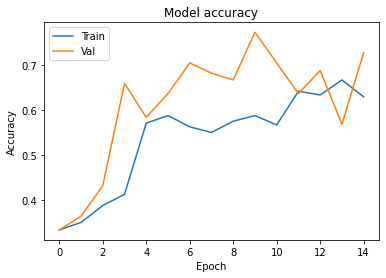

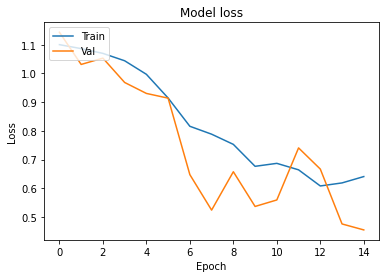

In [12]:
# Plot training & validation accuracy values
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

Increasing the learning rate by the factor 10.

In [16]:
from keras.optimizers import SGD
#compile model
opt = SGD(lr=0.01, momentum=0.9)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

In [17]:
from keras.callbacks import ModelCheckpoint, EarlyStopping
checkpoint = ModelCheckpoint("SGD_Momentum_2.h5", monitor='val_accuracy', verbose=1, save_best_only=True, save_weights_only=False, mode='auto', period=1)
early = EarlyStopping(monitor='val_accuracy', min_delta=0, patience=5, verbose=1, mode='auto')

In [18]:
history=model.fit_generator(
    train_generator,
    steps_per_epoch=nb_train_samples//batch_size,
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=nb_validation_samples//batch_size,
    callbacks=[checkpoint,early])

Epoch 1/20
15/15 [==============================] - 2s 130ms/step - loss: 0.9001 - accuracy: 0.5083 - val_loss: 0.9649 - val_accuracy: 0.6667

Epoch 00001: val_accuracy improved from -inf to 0.66667, saving model to SGD_Momentum_2.h5
Epoch 2/20
15/15 [==============================] - 2s 131ms/step - loss: 0.9359 - accuracy: 0.4875 - val_loss: 0.8478 - val_accuracy: 0.5909

Epoch 00002: val_accuracy did not improve from 0.66667
Epoch 3/20
15/15 [==============================] - 2s 115ms/step - loss: 0.8760 - accuracy: 0.5375 - val_loss: 0.9116 - val_accuracy: 0.5909

Epoch 00003: val_accuracy did not improve from 0.66667
Epoch 4/20
15/15 [==============================] - 2s 117ms/step - loss: 0.7606 - accuracy: 0.6042 - val_loss: 0.6835 - val_accuracy: 0.6591

Epoch 00004: val_accuracy did not improve from 0.66667
Epoch 5/20
15/15 [==============================] - 2s 125ms/step - loss: 0.7102 - accuracy: 0.6000 - val_loss: 0.5322 - val_accuracy: 0.6875

Epoch 00005: val_accuracy imp

Model didn't Converged to the global minimum at this learning rate.

Accuracy of the model is reduced by increasing the learning rate.

Increasing the learning rate by factor of 10

In [19]:
from keras.optimizers import SGD
#compile model
opt = SGD(lr=0.1, momentum=0.9)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

In [20]:
from keras.callbacks import ModelCheckpoint, EarlyStopping
checkpoint = ModelCheckpoint("SGD_Momentum_2.h5", monitor='val_accuracy', verbose=1, save_best_only=True, save_weights_only=False, mode='auto', period=1)
early = EarlyStopping(monitor='val_accuracy', min_delta=0, patience=5, verbose=1, mode='auto')

In [21]:
history=model.fit_generator(
    train_generator,
    steps_per_epoch=nb_train_samples//batch_size,
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=nb_validation_samples//batch_size,
    callbacks=[checkpoint,early])

Epoch 1/20
15/15 [==============================] - 2s 131ms/step - loss: 11.0453 - accuracy: 0.4583 - val_loss: 4.0717 - val_accuracy: 0.3542

Epoch 00001: val_accuracy improved from -inf to 0.35417, saving model to SGD_Momentum_2.h5
Epoch 2/20
15/15 [==============================] - 2s 126ms/step - loss: 2.2247 - accuracy: 0.3417 - val_loss: 1.1038 - val_accuracy: 0.2955

Epoch 00002: val_accuracy did not improve from 0.35417
Epoch 3/20
15/15 [==============================] - 2s 123ms/step - loss: 1.1241 - accuracy: 0.3333 - val_loss: 1.1538 - val_accuracy: 0.2500

Epoch 00003: val_accuracy did not improve from 0.35417
Epoch 4/20
15/15 [==============================] - 2s 122ms/step - loss: 1.1222 - accuracy: 0.3000 - val_loss: 1.0886 - val_accuracy: 0.2955

Epoch 00004: val_accuracy did not improve from 0.35417
Epoch 5/20
15/15 [==============================] - 2s 133ms/step - loss: 1.1123 - accuracy: 0.3333 - val_loss: 1.0998 - val_accuracy: 0.3958

Epoch 00005: val_accuracy im

In [22]:
# Increasing the learning rate makes the model converges to the local minima . 
# Thus accuracy of the model is reducing as the learning rate increases.

Nesterov Accelerated Gradient Descent 

In [ ]:
from keras.optimizers import SGD
#compile model
opt = SGD(lr=0.001, momentum=0.9,nesterov=True)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
from keras.callbacks import ModelCheckpoint, EarlyStopping
checkpoint = ModelCheckpoint("SGD_Momentum_Nes.h5", monitor='val_accuracy', verbose=1, save_best_only=True, save_weights_only=False, mode='auto', period=1)
early = EarlyStopping(monitor='val_accuracy', min_delta=0, patience=5, verbose=1, mode='auto')

In [ ]:
from keras.callbacks import ModelCheckpoint, EarlyStopping
history=model.fit_generator(
    train_generator,
    steps_per_epoch=nb_train_samples//batch_size,
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=nb_validation_samples//batch_size,
    callbacks=[checkpoint,early])

Epoch 1/20
15/15 [==============================] - 3s 171ms/step - loss: 0.6351 - accuracy: 0.6792 - val_loss: 0.4306 - val_accuracy: 0.8125

Epoch 00001: val_accuracy improved from -inf to 0.81250, saving model to SGD_Momentum_Nes.h5
Epoch 2/20
15/15 [==============================] - 2s 159ms/step - loss: 0.6069 - accuracy: 0.6583 - val_loss: 0.5075 - val_accuracy: 0.7727

Epoch 00002: val_accuracy did not improve from 0.81250
Epoch 3/20
15/15 [==============================] - 2s 156ms/step - loss: 0.5784 - accuracy: 0.6958 - val_loss: 0.4054 - val_accuracy: 0.6591

Epoch 00003: val_accuracy did not improve from 0.81250
Epoch 4/20
15/15 [==============================] - 2s 149ms/step - loss: 0.6052 - accuracy: 0.6458 - val_loss: 0.5417 - val_accuracy: 0.8636

Epoch 00004: val_accuracy improved from 0.81250 to 0.86364, saving model to SGD_Momentum_Nes.h5
Epoch 5/20
15/15 [==============================] - 2s 165ms/step - loss: 0.5937 - accuracy: 0.6958 - val_loss: 0.3926 - val_accu

Applying Nesterov Accelerated Gradient Descent Increased the accuracy of the model to 88% and Model Stopped Training as the accuracy doesn't changed from 
88.6%.

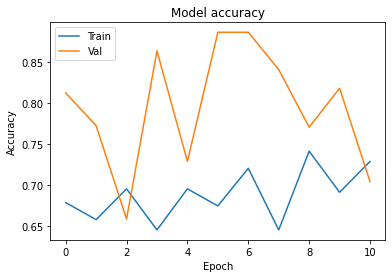

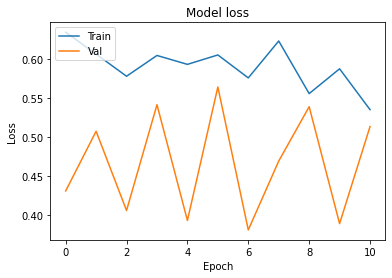

In [ ]:
# Plot training & validation accuracy values
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

RMSprop and ReducedLRonplateau

This callback monitors a quantity and if no improvement is seen for a 'patience' number of epochs, the learning rate is reduced.

In [ ]:
from keras.optimizers import RMSprop
#compile model
opt = RMSprop(lr=0.001)   # Learning rate can be changed and loop can be run for finding the convergence at the specific learning rate
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
from keras.callbacks import ModelCheckpoint,ReduceLROnPlateau
checkpoint = ModelCheckpoint("RMSprop.h5", monitor='val_accuracy', verbose=1, save_best_only=True, save_weights_only=False, mode='auto', period=1)
rlr = ReduceLROnPlateau(monitor='val_loss', factor=0.2,
                              patience=5, min_lr=0.001)

In [ ]:
from keras.callbacks import ModelCheckpoint, EarlyStopping
history=model.fit_generator(
    train_generator,
    steps_per_epoch=nb_train_samples//batch_size,
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=nb_validation_samples//batch_size,
    callbacks=[checkpoint,rlr])

Epoch 1/20
15/15 [==============================] - 2s 161ms/step - loss: 2.1317 - accuracy: 0.5292 - val_loss: 0.4885 - val_accuracy: 0.7708

Epoch 00001: val_accuracy improved from -inf to 0.77083, saving model to RMSprop.h5
Epoch 2/20
15/15 [==============================] - 2s 151ms/step - loss: 0.6787 - accuracy: 0.6667 - val_loss: 0.5807 - val_accuracy: 0.6136

Epoch 00002: val_accuracy did not improve from 0.77083
Epoch 3/20
15/15 [==============================] - 2s 149ms/step - loss: 0.7095 - accuracy: 0.6125 - val_loss: 0.8709 - val_accuracy: 0.6364

Epoch 00003: val_accuracy did not improve from 0.77083
Epoch 4/20
15/15 [==============================] - 2s 150ms/step - loss: 0.5830 - accuracy: 0.7292 - val_loss: 0.3290 - val_accuracy: 0.8864

Epoch 00004: val_accuracy improved from 0.77083 to 0.88636, saving model to RMSprop.h5
Epoch 5/20
15/15 [==============================] - 2s 158ms/step - loss: 0.5944 - accuracy: 0.7167 - val_loss: 0.3896 - val_accuracy: 0.7292

Epoc

Model Accuracy Increased from 88% to 89% in Rms Prop Optimizer.

Adam

In [ ]:
from keras.optimizers import Adam
opt = Adam(lr=0.001,beta_1=0.9,
    beta_2=0.999,
    epsilon=1e-07,
    amsgrad=False)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
from keras.callbacks import ModelCheckpoint,ReduceLROnPlateau
checkpoint = ModelCheckpoint("Adam.h5", monitor='val_accuracy', verbose=1, save_best_only=True, save_weights_only=False, mode='auto', period=1)
rlr = ReduceLROnPlateau(monitor='val_loss', factor=0.2,
                              patience=5, min_lr=0.001)

In [ ]:
history=model.fit_generator(
    train_generator,
    steps_per_epoch=nb_train_samples//batch_size,
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=nb_validation_samples//batch_size,
    callbacks=[checkpoint,rlr])

Epoch 1/20
15/15 [==============================] - 2s 165ms/step - loss: 0.3707 - accuracy: 0.8625 - val_loss: 0.4349 - val_accuracy: 0.8958

Epoch 00001: val_accuracy improved from -inf to 0.89583, saving model to Adam.h5
Epoch 2/20
15/15 [==============================] - 2s 152ms/step - loss: 0.3785 - accuracy: 0.8292 - val_loss: 0.3640 - val_accuracy: 0.8636

Epoch 00002: val_accuracy did not improve from 0.89583
Epoch 3/20
15/15 [==============================] - 2s 155ms/step - loss: 0.3855 - accuracy: 0.8333 - val_loss: 0.4414 - val_accuracy: 0.9091

Epoch 00003: val_accuracy improved from 0.89583 to 0.90909, saving model to Adam.h5
Epoch 4/20
15/15 [==============================] - 2s 150ms/step - loss: 0.3937 - accuracy: 0.8083 - val_loss: 0.1629 - val_accuracy: 0.9318

Epoch 00004: val_accuracy improved from 0.90909 to 0.93182, saving model to Adam.h5
Epoch 5/20
15/15 [==============================] - 2s 158ms/step - loss: 0.3823 - accuracy: 0.8333 - val_loss: 0.2061 - val

Adam Has Predicted the Test set with 100% accuracy. Adam has predicted the best among all the optimizers.

Nadam
Nadam is Adam, but with Nesterov momentum instead of ordinary momentum. The advantage of using Nesterov momentum instead of regular momentum is the same as it is in the SGD case.

In [ ]:
tf.keras.optimizers.Nadam(
    learning_rate=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-07
)

In [ ]:
from keras.callbacks import ModelCheckpoint,ReduceLROnPlateau
checkpoint = ModelCheckpoint("Nadam.h5", monitor='val_accuracy', verbose=1, save_best_only=True, save_weights_only=False, mode='auto', period=1)
rlr = ReduceLROnPlateau(monitor='val_loss', factor=0.2,
                              patience=5, min_lr=0.001)

In [ ]:
history=model.fit_generator(
    train_generator,
    steps_per_epoch=nb_train_samples//batch_size,
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=nb_validation_samples//batch_size,
    callbacks=[checkpoint,rlr])

Epoch 1/20
15/15 [==============================] - 2s 160ms/step - loss: 0.3402 - accuracy: 0.8625 - val_loss: 0.2916 - val_accuracy: 0.9167

Epoch 00001: val_accuracy improved from -inf to 0.91667, saving model to Nadam.h5
Epoch 2/20
15/15 [==============================] - 2s 161ms/step - loss: 0.3106 - accuracy: 0.8583 - val_loss: 0.0709 - val_accuracy: 0.9545

Epoch 00002: val_accuracy improved from 0.91667 to 0.95455, saving model to Nadam.h5
Epoch 3/20
15/15 [==============================] - 2s 150ms/step - loss: 0.3414 - accuracy: 0.8583 - val_loss: 0.1291 - val_accuracy: 0.9318

Epoch 00003: val_accuracy did not improve from 0.95455
Epoch 4/20
15/15 [==============================] - 2s 162ms/step - loss: 0.2995 - accuracy: 0.8750 - val_loss: 0.3411 - val_accuracy: 0.8182

Epoch 00004: val_accuracy did not improve from 0.95455
Epoch 5/20
15/15 [==============================] - 2s 160ms/step - loss: 0.2670 - accuracy: 0.8917 - val_loss: 0.1610 - val_accuracy: 0.8958

Epoch 00

Using Nadam Optimizer , Accuracy of the model is 95%.




This callback monitors a quantity and if no improvement is seen for a 'patience' number of epochs, the learning rate is reduced.